In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def halton_sequence(b):
    """Generator function for Halton sequence."""
    n, d = 0, 1
    while True:
        x = d - n
        if x == 1:
            n = 1
            d *= b
        else:
            y = d // b
            while x <= y:
                y //= b
            n = (b + 1) * y - x
        yield n / d

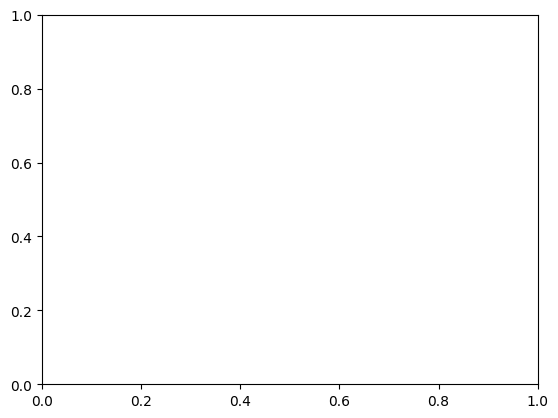

In [3]:
point_density = 100
point_range = np.linspace(1, point_density)
axes = plt.axes()

halton_2_points = []
halton_3_points = []
start_point = [0,0]
final_point = [0.999,0.9999]
counter = 0
for i in halton_sequence(2):
    counter += 1
    if counter < point_density:
        halton_2_points.append(i)
    else:
        break
counter = 0
for i in halton_sequence(3):
    counter += 1
    if counter < point_density:
        halton_3_points.append(i)
    else:
        break
    
    
x_array = np.array([start_point[0]] + halton_2_points + [final_point[0]])
y_array = np.array([start_point[1]] + halton_3_points + [final_point[1]])
#print(len(np.linspace(0,1,point_density-1)))
#print(len(point_array))
#print(len(x_array), len(y_array))
#print(x_array)
#axes.scatter(np.linspace(0,1,point_density-1), point_array)
#print(halton_sequence(point_ra3nge))
#points = point_range, halton_sequence(point_range)

In [4]:
class PointGraph():
    def __init__(self, coordinates, connections=None):
        self.coordinates = coordinates
        self.connections = connections
    def __repr__(self):
        return f"{self.coordinates}" 
    def abs_distance(self,other):
        distance = np.linalg.norm(self.coordinates - other.coordinates)
        return distance
    
    
    
#halton_tuples = (halton_2_array[:], halton_3_array[:])
#print(halton_tuples[0])
halton_points = [PointGraph(np.array([0,0]))]
for i in range(len(x_array)):
    point_coords = np.array([x_array[i], y_array[i]])
    halton_points.append(PointGraph(point_coords))
#print(halton_points)
halton_points[0].abs_distance(halton_points[1])

def make_graph_array(points):
    graph_array = np.ones([point_density + 2, point_density + 2])
    for i in range(len(points)):
        for j in range(len(points)):
            if j != i:
                graph_array[i,j] = points[i].abs_distance(points[j])
    return graph_array
graph_array = make_graph_array(halton_points)
print(graph_array)


[[1.         0.         0.60092521 ... 0.96940426 0.77737966 1.41343589]
 [0.         1.         0.60092521 ... 0.96940426 0.77737966 1.41343589]
 [0.60092521 0.60092521 1.         ... 0.63827172 0.37398736 0.83265366]
 ...
 [0.96940426 0.96940426 0.63827172 ... 1.         0.98775077 0.72891783]
 [0.77737966 0.77737966 0.37398736 ... 0.98775077 1.         0.9489094 ]
 [1.41343589 1.41343589 0.83265366 ... 0.72891783 0.9489094  1.        ]]


In [5]:
def Minimum_Spanning_Algorithm(a_graph, target_node):
    n = target_node
    path_cost = 0
    path_taken = []
    i = 0
    j = 0

    for count in range(0,200):
        path_taken.append(i)
        j = i
        #print(count, i, j)
        if i == n:
            print("H!")
            break
        min_value = min(a_graph[i])
        path_cost += min_value
        
        i = np.argmin(a_graph[i])
        
        #print(i,j)
        #print(a_graph[i,j])
        a_graph[i,j] = 3
        a_graph[j,i] = 3
        #a_graph[j,:] = 1
    print(path_cost)
    print(path_taken)
    print(a_graph[i])
    return path_taken
    
path_taken = Minimum_Spanning_Algorithm(graph_array, point_density+1)

H!
3.056022306447484
[0, 1, 73, 37, 85, 13, 67, 61, 43, 7, 79, 2, 47, 95, 23, 59, 47, 79, 34, 2, 74, 38, 86, 14, 68, 62, 44, 8, 80, 48, 96, 24, 60, 48, 24, 72, 101]
[1.41343589 1.41343589 0.83265366 0.81978379 0.92300958 1.0355708
 0.43498768 0.99707509 0.461322   0.94305658 1.05718368 0.93144501
 0.35002071 1.17644102 0.60480576 0.59121804 0.74318972 1.04997114
 0.47356333 1.17146008 0.63123889 0.88169784 0.88387657 0.76359721
 0.17470208 1.14653205 0.54893325 0.65629026 0.999683   1.01823139
 0.42603867 1.02436212 0.54395165 1.00550116 0.90519866 0.85115323
 0.25337474 1.28073836 0.71368667 0.67133547 0.84637336 1.05077138
 0.45494472 0.99019542 0.4303406  0.79825752 0.96020215 0.79658644
 0.25104075 1.2451258  0.6514688  0.71511864 0.72020287 0.90124683
 0.32804802 1.13318364 0.64649221 0.94161074 0.94787773 0.8311623
 0.24181416 1.07314488 0.49612005 0.52181413 0.93828559 1.16115546
 0.56123087 1.11058002 0.54948878 0.88091258 0.80416218 0.72531516
 3.         1.29402627 0.71145711

[0, 1, 73, 37, 85, 13, 67, 61, 43, 7, 79, 2, 47, 95, 23, 59, 47, 79, 34, 2, 74, 38, 86, 14, 68, 62, 44, 8, 80, 48, 96, 24, 60, 48, 24, 72, 101]


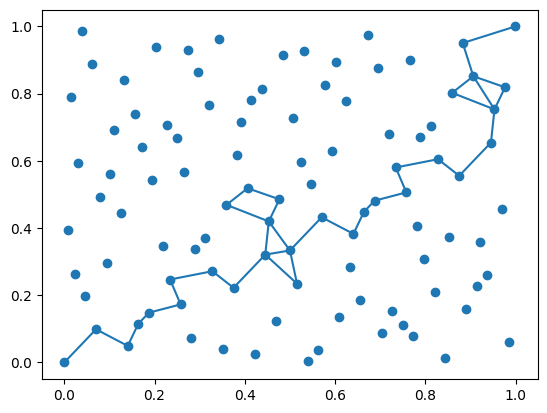

In [6]:
# Path visualisation Section
print(path_taken)
graph_path_taken = []
for node in path_taken:
    graph_path_taken.append(halton_points[node].coordinates)
array_graph_path_taken = np.array(graph_path_taken).T
#print(array_graph_path_taken)
axes2 = plt.axes()
axes2.plot(array_graph_path_taken[0], array_graph_path_taken[1])
axes2.scatter(x_array, y_array)
plt.show()

In [7]:

#points = list(zip(*[np.linspace(a[i], b[i], point_density+1) for i in range(len(a))]))
#points = list(zip(*[np.linspace(a[i], b[i], point_density+1) for i in range(len(a))]))
#print(points)
#points = create_equidistant_points(a,b,5)
#print(points)
#axes.plot(point_range, halton_sequence(point_range))

#Halton Sequence?
